<a href="https://colab.research.google.com/github/reddyse/HES-Intro-To-Deep-Learning/blob/main/Praneeth_Reddy_MNIST_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Import libraries

#Keras libraries
import keras
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense,Conv2D, MaxPool2D, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import KFold

#Generic libraries
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from PIL import Image

In [11]:
# load and print the data from MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# examine the data
# we have 60000 training and 10000 test dataset with 28 X 28 grayscale pixel images 
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

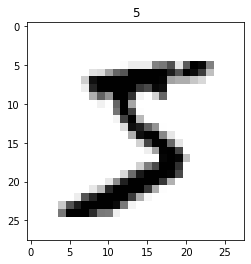

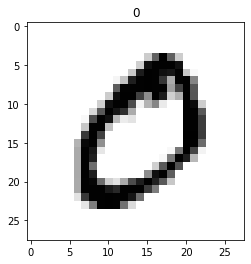

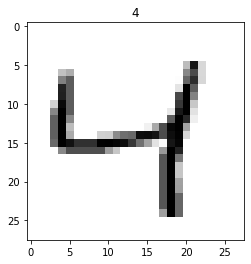

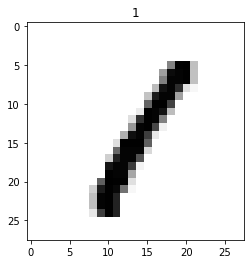

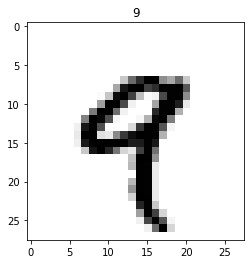

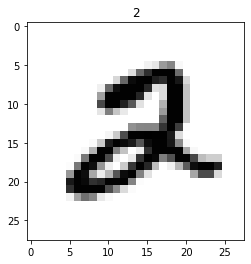

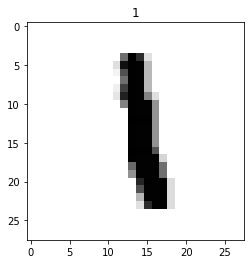

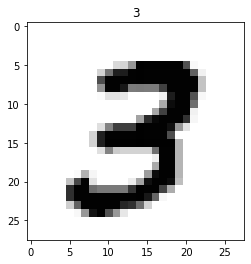

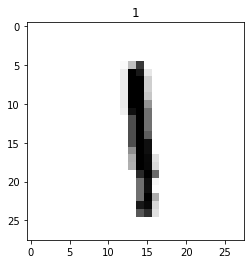

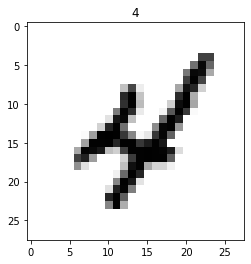

In [12]:
# define a plot funtion using matplotlib
def plot_img(num):
    plt.imshow(X_train[num], cmap='binary')
    plt.title(y_train[num])
    plt.show()

# plot all the 10 number classes/images
for num in range(10):
    plot_img(num)

In [13]:
# Pre-process the images

# Normalizing the image to [0,1] range
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

#Expand/Reshape the dimension of image to (28,28,1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# Convert classes to one hot vector
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

In [14]:
# Come up with a base model and tweak/improve further to make it better

# lets define two variable to track the performance of various models we are training
scores, histories = list(), list()

In [15]:
#Capture model evolution and evaluation

# Although MNIST is effectively solve with excellent dataset available. I wanted to understand how to design the model from scratch and go through itenrative process of evolving the model to get best results. To  
# I used learnings from this excercise and applied them in the second model that I came up for the handwritten text.

# Base model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


# evaluate the model using k-fold cross-validation
# prepare 
kfold = KFold(5, shuffle=True, random_state=1)
# enumerate splits
# I have used 5 folds to evaluate my model
for train_ix, test_ix in kfold.split(X_train):
  # select rows for train and test
  trainX, trainY, testX, testY = X_train[train_ix], y_train[train_ix], X_train[test_ix], y_train[test_ix]
  # fit model
  history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
  # evaluate model
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0))
  # stores scores
  scores.append(acc)
  histories.append(history)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
> 98.275
> 98.808
> 99.475
> 99.792
> 99.967


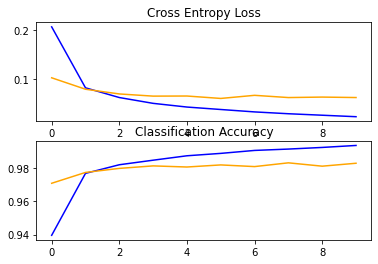

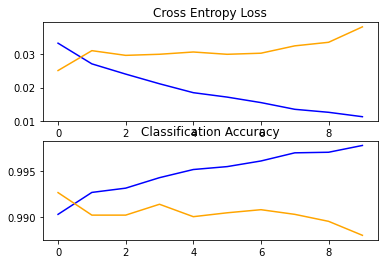

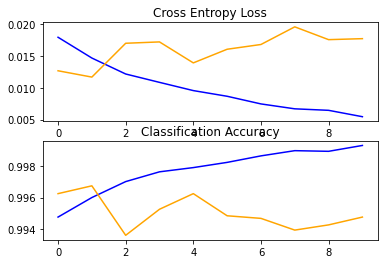

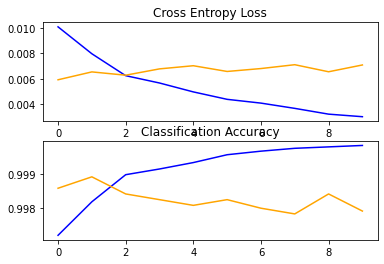

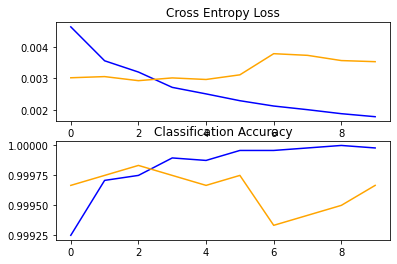

In [16]:
# plot learning curves
for i in range(len(histories)):
  # plot loss
  plt.subplot(2, 1, 1)
  plt.title('Cross Entropy Loss')
  plt.plot(histories[i].history['loss'], color='blue', label='train')
  plt.plot(histories[i].history['val_loss'], color='orange', label='test')
  # plot accuracy
  plt.subplot(2, 1, 2)
  plt.title('Classification Accuracy')
  plt.plot(histories[i].history['accuracy'], color='blue', label='train')
  plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  plt.show()

Accuracy (using mean and std dev): mean=99.263 std=0.633, n=5


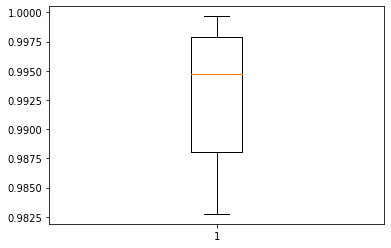

In [17]:
# summary of the model
# print summary
print('Accuracy (using mean and std dev): mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
plt.boxplot(scores)
plt.show()

In [18]:

# First improved model
# improve the learning rate of the model using batch normalization to see the performance 

from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
# used batch normalization to normalize the inputs
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
model.summary()

# compile model
opt='adam'
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


# evaluate the model using k-fold cross-validation
# prepare 
kfold = KFold(5, shuffle=True, random_state=1)
# enumerate splits
# I have used 5 folds to evaluate my model
for train_ix, test_ix in kfold.split(X_train):
  # select rows for train and test
  trainX, trainY, testX, testY = X_train[train_ix], y_train[train_ix], X_train[test_ix], y_train[test_ix]
  # fit model
  history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
  # evaluate model
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0))
  # stores scores
  scores.append(acc)
  histories.append(history)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 5408)             21632     
 hNormalization)                                                 
                                                      

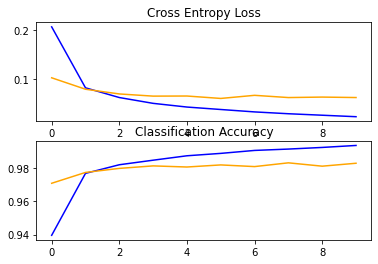

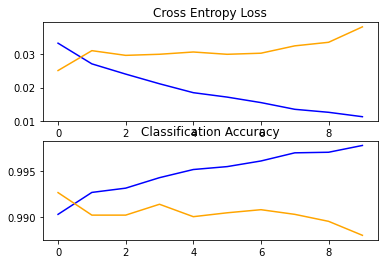

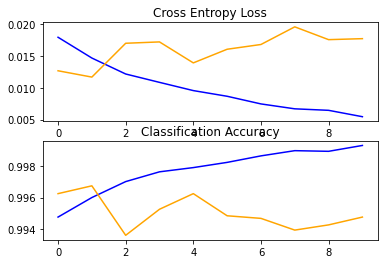

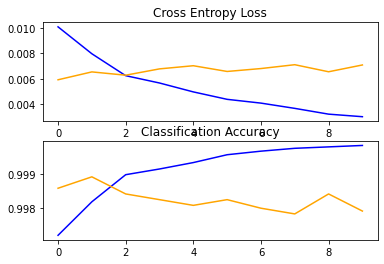

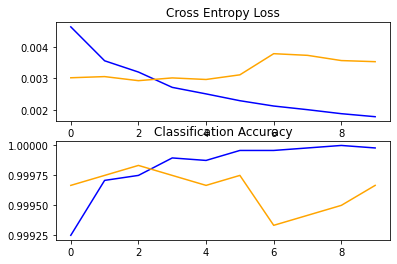

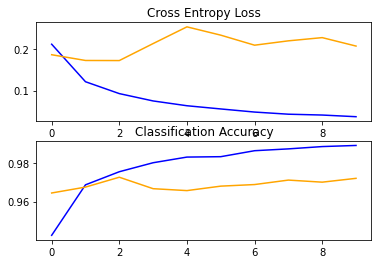

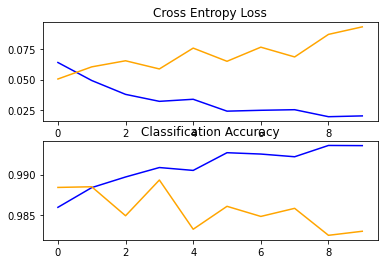

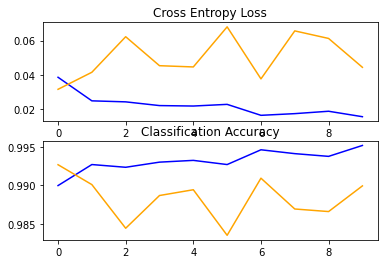

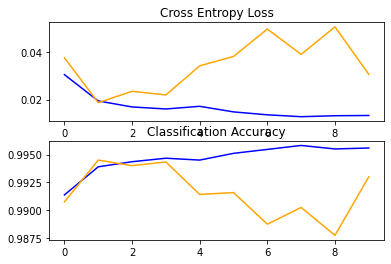

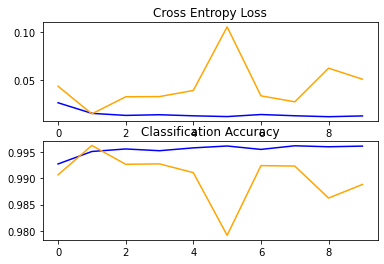

In [19]:
# plot learning curves
for i in range(len(histories)):
  # plot loss
  plt.subplot(2, 1, 1)
  plt.title('Cross Entropy Loss')
  plt.plot(histories[i].history['loss'], color='blue', label='train')
  plt.plot(histories[i].history['val_loss'], color='orange', label='test')
  # plot accuracy
  plt.subplot(2, 1, 2)
  plt.title('Classification Accuracy')
  plt.plot(histories[i].history['accuracy'], color='blue', label='train')
  plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  plt.show()

Accuracy (using mean and std dev): mean=98.901 std=0.776, n=10


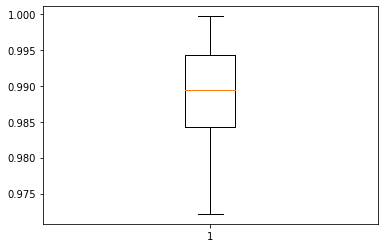

In [20]:
# summary of the model
# print summary
print('Accuracy (using mean and std dev): mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
plt.boxplot(scores)
plt.show()

In [21]:

# Second improved model with imporved depth. This is the final model
# The combination of 'relu' and 'softmax' functions is giving best results

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.summary()

#compile the model
# Also notice the change in optimizer to 'adam' from 'SGD', that gave better results
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss = keras.losses.categorical_crossentropy,metrics=['accuracy'])

# evaluate the model using k-fold cross-validation
# prepare 
kfold = KFold(5, shuffle=True, random_state=1)
# enumerate splits
# I have used 5 folds to evaluate my model
for train_ix, test_ix in kfold.split(X_train):
  # select rows for train and test
  trainX, trainY, testX, testY = X_train[train_ix], y_train[train_ix], X_train[test_ix], y_train[test_ix]
  # fit model
  history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
  # evaluate model
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0))
  # stores scores
  scores.append(acc)
  histories.append(history)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

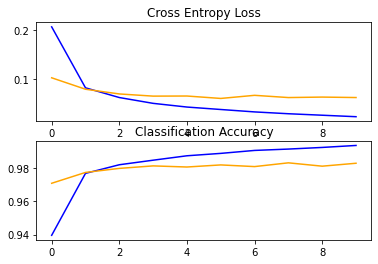

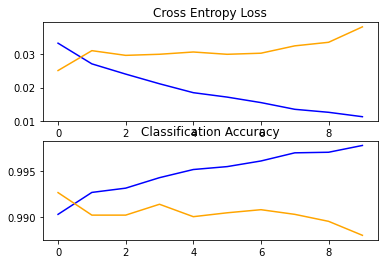

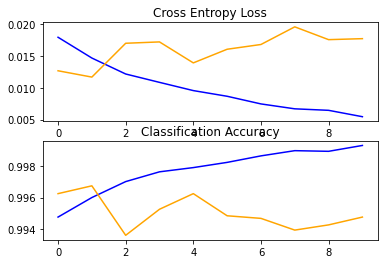

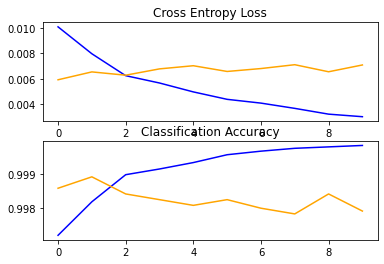

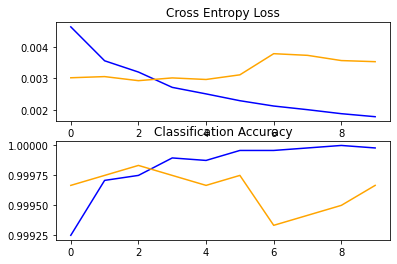

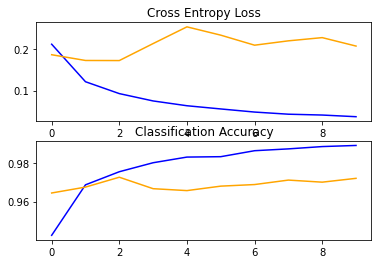

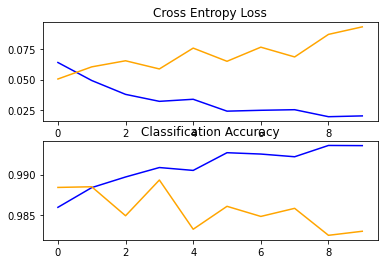

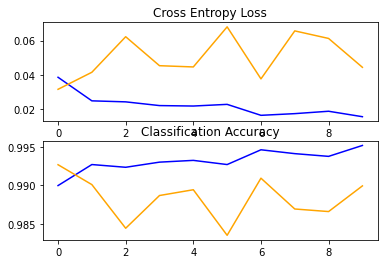

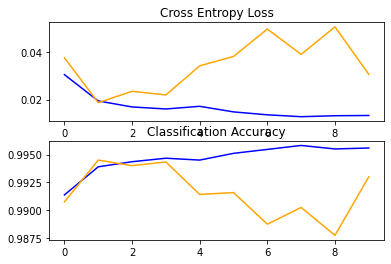

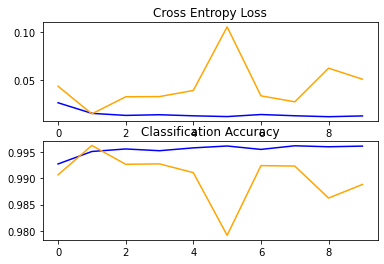

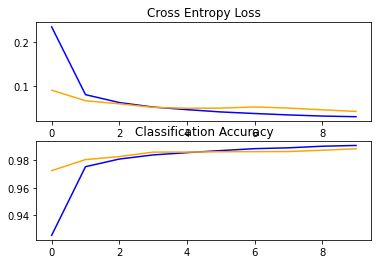

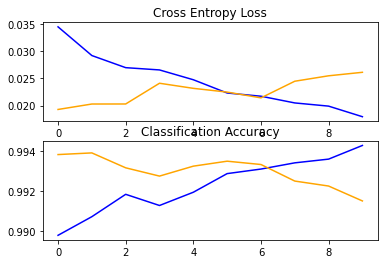

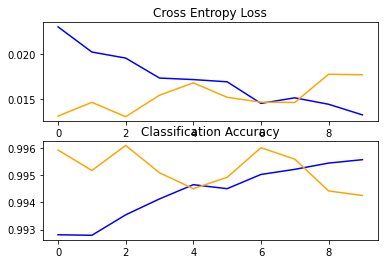

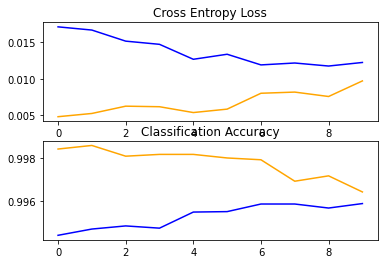

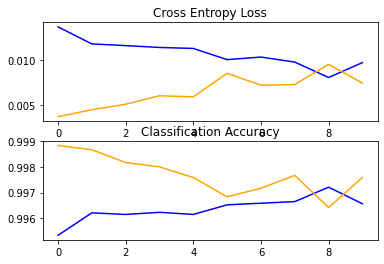

In [22]:
# plot learning curves
for i in range(len(histories)):
  # plot loss
  plt.subplot(2, 1, 1)
  plt.title('Cross Entropy Loss')
  plt.plot(histories[i].history['loss'], color='blue', label='train')
  plt.plot(histories[i].history['val_loss'], color='orange', label='test')
  # plot accuracy
  plt.subplot(2, 1, 2)
  plt.title('Classification Accuracy')
  plt.plot(histories[i].history['accuracy'], color='blue', label='train')
  plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  plt.show()

Accuracy (using mean and std dev): mean=99.054 std=0.698, n=15


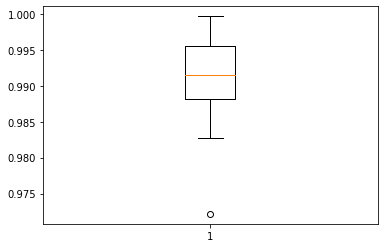

In [23]:
# summary of the model
# print summary
print('Accuracy (using mean and std dev): mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
plt.boxplot(scores)
plt.show()

In [24]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

# variable with the path to the destination folder
dir = '/content/drive/My Drive/Colab Notebooks/FinalProject/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
#FINAL TRAINING AND SAVING THE MODEL

# Retrain the model for 50 epochs and save it for future use
#modelchkpoint = ModelCheckpoint("C:\\Praneeth\\HarvardExtensionSchool\\Course3IntroToDeepLEarning\\DeepLearningAssignments\\FinalProject\\vscode\\model\\mnistmodelv1.h5", monitor="val_acc", verbose=1, save_best_only= True)
modelchkpoint = ModelCheckpoint(dir+'mnistmodel_final.h5', monitor="val_acc", verbose=1, save_best_only= True)

# Modifying no. of epochs to 50 as this model is giving best results 
# Earlystopping
# used this callback to stop the training process at highest performing point
earlystopping = EarlyStopping(monitor='val_acc', min_delta =0.01, patience = 4, verbose=1)
cb = [earlystopping,modelchkpoint]
history = model.fit(X_train, y_train, epochs = 50, validation_split=0.3, callbacks=cb)

# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))
# stores scores
scores.append(acc)
histories.append(history)

# save the model for future use
model.save(dir+'mnistmodel_final.h5')

Epoch 1/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0109 - accuracy: 0.9963

1313/1313 [==============================] - 6s 5ms/step - loss: 0.0109 - accuracy: 0.9963 - val_loss: 0.0045 - val_accuracy: 0.9986
Epoch 2/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0101 - accuracy: 0.9966

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0101 - accuracy: 0.9966 - val_loss: 0.0044 - val_accuracy: 0.9987
Epoch 3/50
1302/1313 [============================>.] - ETA: 0s - loss: 0.0085 - accuracy: 0.9970

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0086 - accuracy: 0.9970 - val_loss: 0.0044 - val_accuracy: 0.9986
Epoch 4/50
1307/1313 [============================>.] - ETA: 0s - loss: 0.0081 - accuracy: 0.9973

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.0058 - val_accuracy: 0.9980
Epoch 5/50
1303/1313 [============================>.] - ETA: 0s - loss: 0.0082 - accuracy: 0.9972

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0081 - accuracy: 0.9972 - val_loss: 0.0055 - val_accuracy: 0.9981
Epoch 6/50
1302/1313 [============================>.] - ETA: 0s - loss: 0.0074 - accuracy: 0.9975

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0073 - accuracy: 0.9975 - val_loss: 0.0063 - val_accuracy: 0.9978
Epoch 7/50
1307/1313 [============================>.] - ETA: 0s - loss: 0.0070 - accuracy: 0.9977

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0070 - accuracy: 0.9977 - val_loss: 0.0064 - val_accuracy: 0.9978
Epoch 8/50
1306/1313 [============================>.] - ETA: 0s - loss: 0.0076 - accuracy: 0.9973

1313/1313 [==============================] - 7s 5ms/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.0071 - val_accuracy: 0.9976
Epoch 9/50
1299/1313 [============================>.] - ETA: 0s - loss: 0.0064 - accuracy: 0.9978

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.0097 - val_accuracy: 0.9966
Epoch 10/50
1307/1313 [============================>.] - ETA: 0s - loss: 0.0063 - accuracy: 0.9979

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.0072 - val_accuracy: 0.9974
Epoch 11/50
1309/1313 [============================>.] - ETA: 0s - loss: 0.0057 - accuracy: 0.9982

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.0084 - val_accuracy: 0.9975
Epoch 12/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0067 - accuracy: 0.9975

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0067 - accuracy: 0.9975 - val_loss: 0.0079 - val_accuracy: 0.9977
Epoch 13/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0059 - accuracy: 0.9979

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0059 - accuracy: 0.9979 - val_loss: 0.0078 - val_accuracy: 0.9977
Epoch 14/50
1310/1313 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.9976

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0063 - accuracy: 0.9975 - val_loss: 0.0080 - val_accuracy: 0.9977
Epoch 15/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0064 - accuracy: 0.9979

1313/1313 [==============================] - 5s 4ms/step - loss: 0.0064 - accuracy: 0.9979 - val_loss: 0.0094 - val_accuracy: 0.9966
Epoch 16/50
1307/1313 [============================>.] - ETA: 0s - loss: 0.0067 - accuracy: 0.9974

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0067 - accuracy: 0.9974 - val_loss: 0.0092 - val_accuracy: 0.9969
Epoch 17/50
1299/1313 [============================>.] - ETA: 0s - loss: 0.0053 - accuracy: 0.9980

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0053 - accuracy: 0.9980 - val_loss: 0.0095 - val_accuracy: 0.9969
Epoch 18/50
1304/1313 [============================>.] - ETA: 0s - loss: 0.0047 - accuracy: 0.9982

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0047 - accuracy: 0.9982 - val_loss: 0.0127 - val_accuracy: 0.9961
Epoch 19/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0053 - accuracy: 0.9981

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0053 - accuracy: 0.9981 - val_loss: 0.0088 - val_accuracy: 0.9973
Epoch 20/50
1310/1313 [============================>.] - ETA: 0s - loss: 0.0054 - accuracy: 0.9980

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0054 - accuracy: 0.9980 - val_loss: 0.0109 - val_accuracy: 0.9968
Epoch 21/50
1302/1313 [============================>.] - ETA: 0s - loss: 0.0060 - accuracy: 0.9981

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.0095 - val_accuracy: 0.9974
Epoch 22/50
1300/1313 [============================>.] - ETA: 0s - loss: 0.0045 - accuracy: 0.9984

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0045 - accuracy: 0.9984 - val_loss: 0.0085 - val_accuracy: 0.9977
Epoch 23/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0046 - accuracy: 0.9985

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0096 - val_accuracy: 0.9969
Epoch 24/50
1308/1313 [============================>.] - ETA: 0s - loss: 0.0040 - accuracy: 0.9988

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0121 - val_accuracy: 0.9962
Epoch 25/50
1303/1313 [============================>.] - ETA: 0s - loss: 0.0042 - accuracy: 0.9985

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0042 - accuracy: 0.9985 - val_loss: 0.0113 - val_accuracy: 0.9962
Epoch 26/50
1309/1313 [============================>.] - ETA: 0s - loss: 0.0058 - accuracy: 0.9978

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0058 - accuracy: 0.9978 - val_loss: 0.0110 - val_accuracy: 0.9965
Epoch 27/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0059 - accuracy: 0.9981

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0059 - accuracy: 0.9981 - val_loss: 0.0099 - val_accuracy: 0.9969
Epoch 28/50
1309/1313 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 0.9990

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.0104 - val_accuracy: 0.9967
Epoch 29/50
1305/1313 [============================>.] - ETA: 0s - loss: 0.0049 - accuracy: 0.9983

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 0.0119 - val_accuracy: 0.9962
Epoch 30/50
1305/1313 [============================>.] - ETA: 0s - loss: 0.0054 - accuracy: 0.9981

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0055 - accuracy: 0.9980 - val_loss: 0.0123 - val_accuracy: 0.9964
Epoch 31/50
1303/1313 [============================>.] - ETA: 0s - loss: 0.0048 - accuracy: 0.9982

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 0.0132 - val_accuracy: 0.9963
Epoch 32/50
1310/1313 [============================>.] - ETA: 0s - loss: 0.0052 - accuracy: 0.9979

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0052 - accuracy: 0.9979 - val_loss: 0.0111 - val_accuracy: 0.9964
Epoch 33/50
1298/1313 [============================>.] - ETA: 0s - loss: 0.0043 - accuracy: 0.9987

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0122 - val_accuracy: 0.9966
Epoch 34/50
1305/1313 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 0.9988

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0037 - accuracy: 0.9988 - val_loss: 0.0122 - val_accuracy: 0.9966
Epoch 35/50
1307/1313 [============================>.] - ETA: 0s - loss: 0.0043 - accuracy: 0.9988

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.0137 - val_accuracy: 0.9962
Epoch 36/50
1298/1313 [============================>.] - ETA: 0s - loss: 0.0052 - accuracy: 0.9981

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0052 - accuracy: 0.9981 - val_loss: 0.0130 - val_accuracy: 0.9962
Epoch 37/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0049 - accuracy: 0.9980

1313/1313 [==============================] - 5s 4ms/step - loss: 0.0049 - accuracy: 0.9980 - val_loss: 0.0121 - val_accuracy: 0.9964
Epoch 38/50
1307/1313 [============================>.] - ETA: 0s - loss: 0.0039 - accuracy: 0.9987

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.0124 - val_accuracy: 0.9965
Epoch 39/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 0.9982

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0044 - accuracy: 0.9982 - val_loss: 0.0143 - val_accuracy: 0.9962
Epoch 40/50
1308/1313 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 0.9987

1313/1313 [==============================] - 7s 5ms/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 0.0119 - val_accuracy: 0.9966
Epoch 41/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0046 - accuracy: 0.9983

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0046 - accuracy: 0.9983 - val_loss: 0.0126 - val_accuracy: 0.9966
Epoch 42/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 0.9989

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0134 - val_accuracy: 0.9961
Epoch 43/50
1300/1313 [============================>.] - ETA: 0s - loss: 0.0045 - accuracy: 0.9984

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0045 - accuracy: 0.9984 - val_loss: 0.0137 - val_accuracy: 0.9959
Epoch 44/50
1307/1313 [============================>.] - ETA: 0s - loss: 0.0038 - accuracy: 0.9987

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.0160 - val_accuracy: 0.9948
Epoch 45/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.9988

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.0146 - val_accuracy: 0.9958
Epoch 46/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0034 - accuracy: 0.9990

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0149 - val_accuracy: 0.9959
Epoch 47/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0033 - accuracy: 0.9990

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0149 - val_accuracy: 0.9955
Epoch 48/50
1303/1313 [============================>.] - ETA: 0s - loss: 0.0039 - accuracy: 0.9985

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0040 - accuracy: 0.9985 - val_loss: 0.0145 - val_accuracy: 0.9956
Epoch 49/50
1304/1313 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 0.9987

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.0165 - val_accuracy: 0.9956
Epoch 50/50
1301/1313 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 0.9989

1313/1313 [==============================] - 6s 4ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0173 - val_accuracy: 0.9953
> 99.867


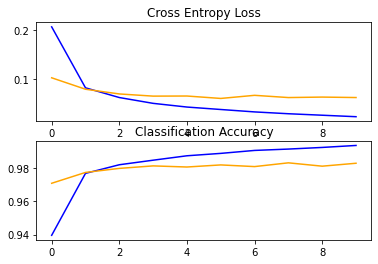

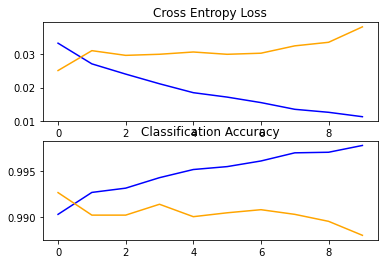

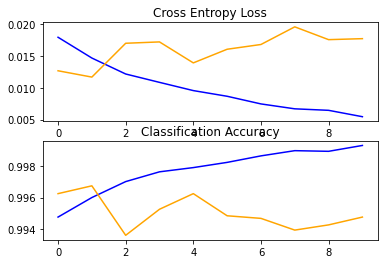

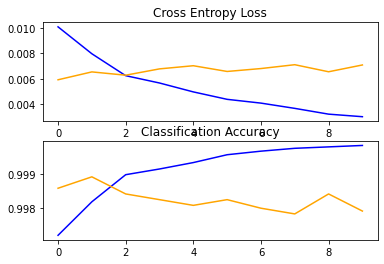

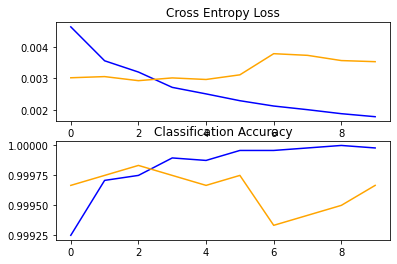

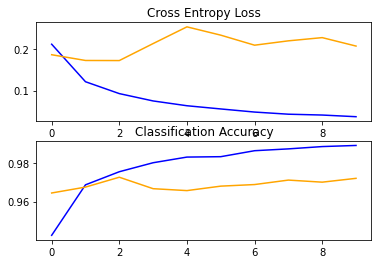

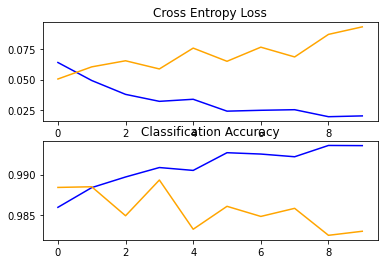

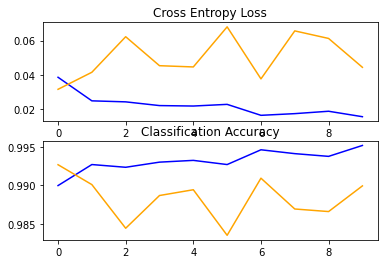

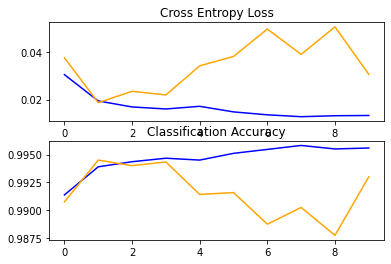

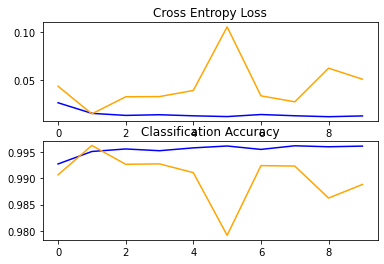

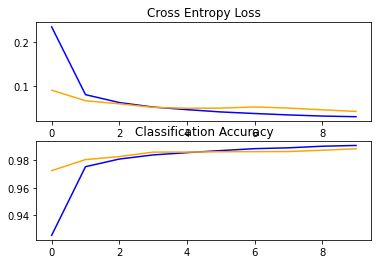

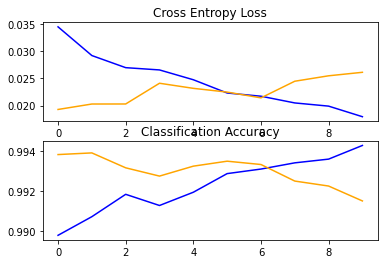

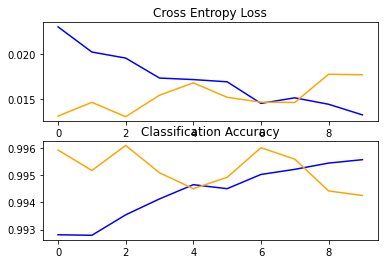

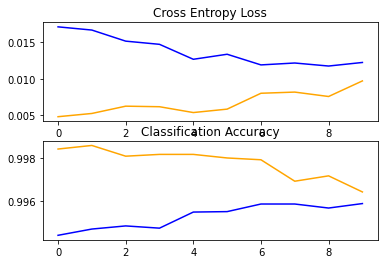

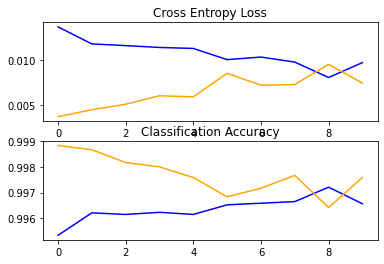

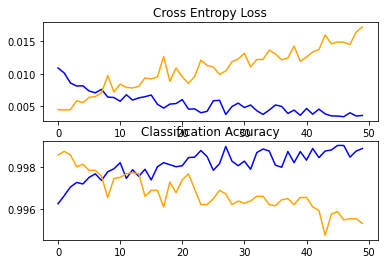

In [26]:
#Evolution of the model through all the experiments

# plot learning curves
for i in range(len(histories)):
  # plot loss
  plt.subplot(2, 1, 1)
  plt.title('Cross Entropy Loss')
  plt.plot(histories[i].history['loss'], color='blue', label='train')
  plt.plot(histories[i].history['val_loss'], color='orange', label='test')
  # plot accuracy
  plt.subplot(2, 1, 2)
  plt.title('Classification Accuracy')
  plt.plot(histories[i].history['accuracy'], color='blue', label='train')
  plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  plt.show()

Accuracy (using mean and std dev): mean=99.105 std=0.704, n=16


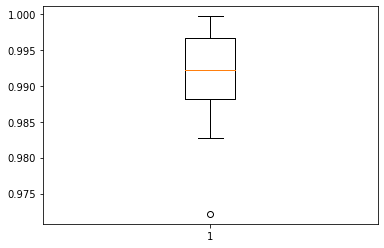

In [27]:
# summary of the model
# print summary
print('Accuracy (using mean and std dev): mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
plt.boxplot(scores)
plt.show()

In [28]:
# Load and evaluate the model
model_S = keras.models.load_model(dir+'mnistmodel_final.h5')
score = model_S.evaluate(X_test, y_test)
print(f" the model accuracy is {score[1]} ")

313/313 [==============================] - 1s 3ms/step - loss: 0.0339 - accuracy: 0.9928
 the model accuracy is 0.9927999973297119 


1/1 [==============================] - 0s 16ms/step


Text(0.5, 1.0, 'predict:1')

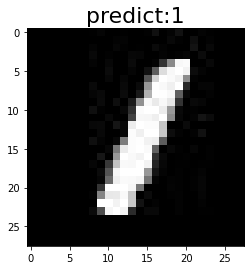

In [34]:
# test the model with some sample images
img1= Image.open(dir+'img_70.jpg')
img1 = np.asarray(img1)

# predict the input image
predict_1=model_S.predict((img1/255).reshape((1,28,28,1))) 
classes_1=np.argmax(predict_1,axis=1)

# plot the prediction result
plt.figure('img1')
plt.imshow(img1,cmap='gray')
plt.title('predict:'+str(classes_1[0]), fontsize=22)

In [70]:
def get_numbers(img):
    letters = []
    image = cv2.imread(img) # read the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert to gray scale
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV) 
    dilated = cv2.dilate(thresh1, None, iterations=2) # clean the image using dilation

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) # find the contours
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0] # call the function created above to sort contours
    
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (28, 28), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,28,28,1)
        ypred = model_S.predict(thresh)
        #ypred = label_binarizer.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image


def get_number(letter):
    #print(letter)
    #word = " ".join(letter)
    classes_1=np.argmax(letter,axis=1)
    for item in range(len(classes_1)):
      print(classes_1[item])
    return letter

# This is a custom definition to find and sort contours 
# Contours are a curve joining all the continuous points (along the boundary), having same color or intensity. This process helps us to define the shape of the image to which we can apply our model.
# For the image we are passing, the below funtion will return the list of sorted contours with bounding boxes
# I am using a openCv inbuit funtion to do this. 
def sort_contours(cnts, method="left-to-right"): # 'left-to-right' ensures the contours are read starting from left, some languages might demand other directions
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)


1/1 [==============================] - 0s 20ms/step
0
3
5
6
8
0


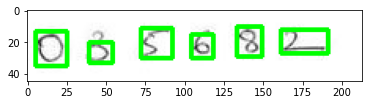

In [71]:
# input number as an imge
import imutils
number,image = get_numbers('/content/drive/My Drive/Colab Notebooks/FinalProject/handwritten-characters/demo_mrn.JPG')
plt.imshow(image)


# output as a text number
word = get_number(number)